The Pearson correlation coefficient between IOVC and Hit Rate is: 0.5445
The Spearman correlation coefficient between IOVC and Hit Rate is: 0.5457


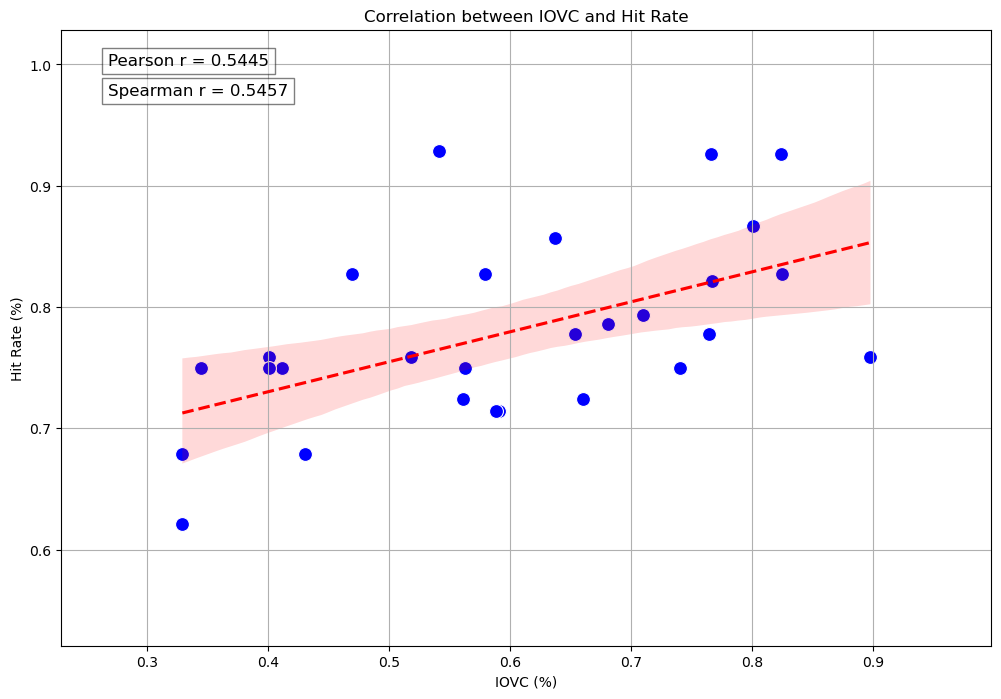

Plot saved to correlation_plot_no_outliers.png
Merged data saved to merged_data.csv


In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# File paths for the CSV files
iovc_file = os.path.join('..', 'IOVCcalculation', 'sorted_iovc_scores_first_view.csv')
#hit_rate_file = os.path.join('..', '..', 'hit_rate_scores.csv')
hit_rate_file = os.path.join('..', '..', 'hit_rate_scores - Copy.csv') #without APYT (worst IOVC) and AESD (best IOVC)

# Read the CSV files into DataFrames
df_iovc = pd.read_csv(iovc_file)
df_hit_rate = pd.read_csv(hit_rate_file)

# Strip unnecessary characters from the file paths
df_iovc['imagePath'] = df_iovc['imagePath'].str.replace('targetImages\\', '')
df_hit_rate['Image'] = df_hit_rate['Image'].str.replace('targetImages\\', '')

# Merge the two DataFrames on the image path to align the data
df_merged = pd.merge(df_iovc, df_hit_rate, left_on='imagePath', right_on='Image')

# Check if the merge was successful
if df_merged.empty:
    print("No matching images found between the two datasets.")
else:
    # Convert 'IOVC' and 'Hit Rate' to numeric values
    df_merged['IOVC'] = pd.to_numeric(df_merged['IOVC'], errors='coerce')
    df_merged['Hit Rate'] = df_merged['Hit Rate'].str.rstrip('%').astype(float) / 100.0

    # Calculate the Pearson correlation coefficient between IOVC and Hit Rate
    pearson_correlation = df_merged['IOVC'].corr(df_merged['Hit Rate'])
    print(f"The Pearson correlation coefficient between IOVC and Hit Rate is: {pearson_correlation:.4f}")

    # Calculate the Spearman correlation coefficient between IOVC and Hit Rate
    spearman_correlation, _ = spearmanr(df_merged['IOVC'], df_merged['Hit Rate'])
    print(f"The Spearman correlation coefficient between IOVC and Hit Rate is: {spearman_correlation:.4f}")

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='IOVC', y='Hit Rate', data=df_merged, marker='o', s=100, color='blue')
    sns.regplot(x='IOVC', y='Hit Rate', data=df_merged, scatter=False, color='red', line_kws={'linestyle': '--'})

    plt.title('Correlation between IOVC and Hit Rate')
    plt.xlabel('IOVC (%)')
    plt.ylabel('Hit Rate (%)')
    plt.grid(True)
    plt.xlim(df_merged['IOVC'].min() - 0.1, df_merged['IOVC'].max() + 0.1)  # Adjust limits if needed
    plt.ylim(df_merged['Hit Rate'].min() - 0.1, df_merged['Hit Rate'].max() + 0.1)  # Adjust limits if needed

    # Add the Pearson and Spearman correlation coefficients to the plot
    plt.text(0.05, 0.95, f'Pearson r = {pearson_correlation:.4f}', ha='left', va='center', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.05, 0.90, f'Spearman r = {spearman_correlation:.4f}', ha='left', va='center', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    # Save the plot to a file
    plot_path = 'correlation_plot_no_outliers.png'
    plt.savefig(plot_path, bbox_inches='tight')
    plt.show()
    print(f"Plot saved to {plot_path}")

    # Optional: Save the merged DataFrame to a new CSV file for reference
    merged_csv_path = 'merged_data.csv'
    df_merged.to_csv(merged_csv_path, index=False)
    print(f"Merged data saved to {merged_csv_path}")


In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = df_merged[['IOVC']].values
y = df_merged['Hit Rate'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the model parameters
intercept = model.intercept_
slope = model.coef_[0]

print(f"Linear regression equation: Hit Rate = {intercept:.4f} + {slope:.4f} * IOVC")


Linear regression equation: Hit Rate = 0.6631 + 0.2354 * IOVC


Spearman's rank correlation coefficient: 0.14299496733169148
P-value: 0.4678977310320436
Y (Actual values):  [(0.781934130416983, 0.9231), (0.719923813110615, 0.7585999999999999), (0.6847905908415969, 0.8621), (0.6541516000392653, 0.7692), (0.6233610730716127, 0.8214), (0.5630028719478655, 0.9231), (0.533893943576347, 0.7857), (0.5335252761003504, 0.7778), (0.5230080591502781, 0.8214), (0.5132164700127839, 0.7857), (0.4970844827006057, 0.75), (0.49308259555744, 0.7143), (0.458146666186903, 0.6071), (0.4561176300869571, 0.7406999999999999), (0.4491950237319031, 0.8519), (0.390002594197146, 0.7143), (0.3858071425505027, 0.7037), (0.3740537065798247, 0.8214), (0.3648751428775637, 0.7585999999999999), (0.3363488739953948, 0.8276), (0.3147795270513762, 0.7143), (0.2945470651032661, 0.7037), (0.2429006120569946, 0.6071), (0.2269048959181574, 0.7406999999999999), (0.1890220412276114, 0.7406999999999999), (0.173234842321224, 0.75), (0.1428652962456467, 0.75), (0.0834038695239217, 0.66670000000

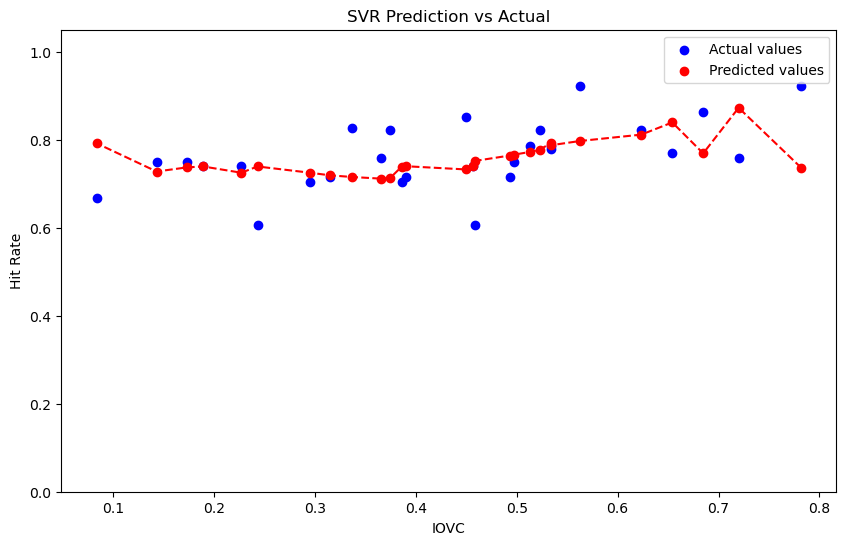

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.stats import spearmanr

# Prepare the data
X = df_merged[['IOVC']].values  # Input features
y = df_merged['Hit Rate'].values  # Target variable

# Initialize lists to store MSEs and predictions for plotting
mse_values = []
predictions = []
actual_values = []

# Initialize the SVR model
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.01))

# Perform Leave-One-Out Cross-Validation
for i in range(len(X)):
    # Split the data into training and testing sets
    X_train = np.delete(X, i, 0)
    y_train = np.delete(y, i, 0)
    X_test = X[i].reshape(1, -1)  # Reshape for a single test instance
    y_test = y[i]

    # Train the SVR model
    svr_model.fit(X_train, y_train)

    # Make prediction for the test set
    svr_prediction = svr_model.predict(X_test)[0]  # Get the scalar value of the prediction

    # Calculate the Mean Squared Error between the actual and predicted values
    mse = mean_squared_error([y_test], [svr_prediction])
    mse_values.append(mse)

    # Store predictions and actual values for plotting
    predictions.append(svr_prediction)
    actual_values.append(y_test)

    #print(f"Mean Squared Error for image {i+1}: {mse:.4f}")

# Calculate the average Mean Squared Error across all iterations
average_mse = np.mean(mse_values)
#print(f"Average Mean Squared Error over all images: {average_mse:.4f}")

# Calculate the correlation coefficient between actual and predicted values
correlation, p_value = spearmanr(y, predictions)
print(f"Spearman's rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

print("Y (Actual values): ", list(zip(X.flatten(), y)))  # Flatten X for better readability
print("Predictions: ", list(zip(X.flatten(), predictions)))


# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual values')
plt.scatter(X, predictions, color='red', label='Predicted values')
plt.plot(X, predictions, color='red', linestyle='--')
plt.xlabel('IOVC')
plt.ylabel('Hit Rate')
plt.title('SVR Prediction vs Actual')
plt.legend()
plt.ylim(0, 1.05)  # Set Y-axis limits from 0 to 1
plt.show()


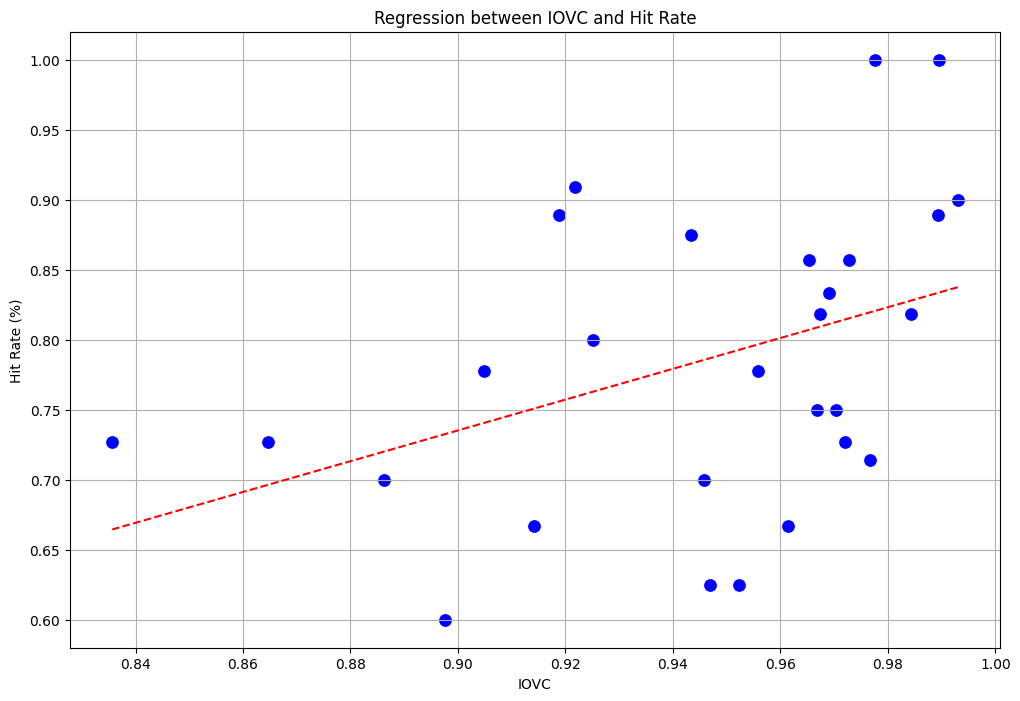

In [7]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='IOVC', y='Hit Rate', data=df_merged, marker='o', s=100, color='blue')
plt.plot(df_merged['IOVC'], model.predict(X), color='red', linestyle='--')

plt.title('Regression between IOVC and Hit Rate')
plt.xlabel('IOVC')
plt.ylabel('Hit Rate (%)')
plt.grid(True)
plt.show()


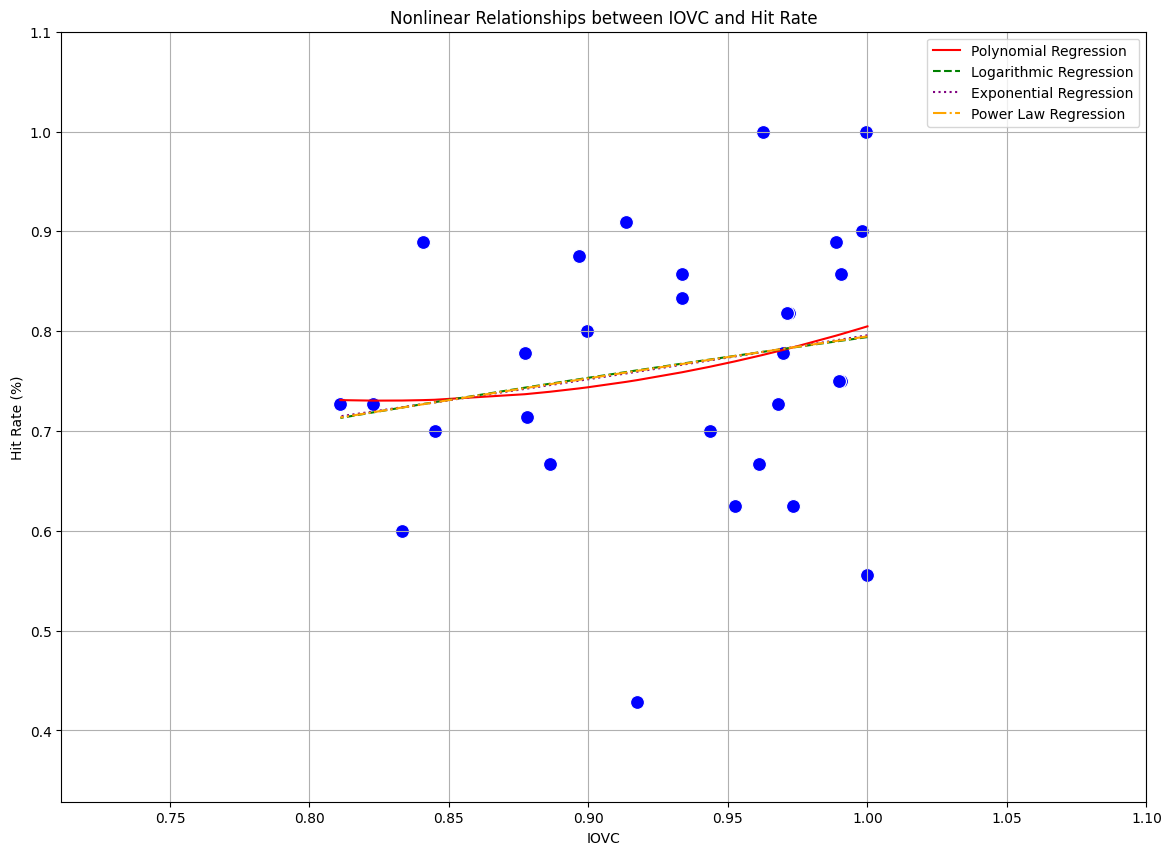

Plot saved to nonlinear_correlation_plot.png
Merged data saved to merged_data.csv


In [82]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# File paths for the CSV files
iovc_file = os.path.join('..', 'IOVCcalculation', 'sorted_iovc_scores.csv')
hit_rate_file = os.path.join('..', '..', 'hit_rate_scores.csv')

# Read the CSV files into DataFrames
df_iovc = pd.read_csv(iovc_file)
df_hit_rate = pd.read_csv(hit_rate_file)

# Strip unnecessary characters from the file paths
df_iovc['imagePath'] = df_iovc['imagePath'].str.replace('targetImages\\', '')
df_hit_rate['Image'] = df_hit_rate['Image'].str.replace('targetImages\\', '')

# Merge the two DataFrames on the image path to align the data
df_merged = pd.merge(df_iovc, df_hit_rate, left_on='imagePath', right_on='Image')

# Check if the merge was successful
if df_merged.empty:
    print("No matching images found between the two datasets.")
else:
    # Convert 'IOVC' and 'Hit Rate' to numeric values
    df_merged['IOVC'] = pd.to_numeric(df_merged['IOVC'], errors='coerce')
    df_merged['Hit Rate'] = df_merged['Hit Rate'].str.rstrip('%').astype(float) / 100.0

    # Function definitions for various nonlinear models
    def polynomial(x, a, b, c):
        return a * x**2 + b * x + c

    def logarithmic(x, a, b):
        return a * np.log(x) + b

    def exponential(x, a, b):
        return a * np.exp(b * x)

    def power_law(x, a, b):
        return a * x**b

    # Fit models and plot
    plt.figure(figsize=(14, 10))

    # Scatter plot
    sns.scatterplot(x='IOVC', y='Hit Rate', data=df_merged, marker='o', s=100, color='blue')

    # Polynomial regression
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(df_merged[['IOVC']])
    poly_model = LinearRegression().fit(X_poly, df_merged['Hit Rate'])
    plt.plot(df_merged['IOVC'], poly_model.predict(X_poly), color='red', label='Polynomial Regression')

    # Logarithmic regression
    popt_log, _ = curve_fit(logarithmic, df_merged['IOVC'], df_merged['Hit Rate'])
    plt.plot(df_merged['IOVC'], logarithmic(df_merged['IOVC'], *popt_log), color='green', linestyle='--', label='Logarithmic Regression')

    # Exponential regression
    popt_exp, _ = curve_fit(exponential, df_merged['IOVC'], df_merged['Hit Rate'], maxfev=10000)
    plt.plot(df_merged['IOVC'], exponential(df_merged['IOVC'], *popt_exp), color='purple', linestyle=':', label='Exponential Regression')

    # Power law regression
    popt_pow, _ = curve_fit(power_law, df_merged['IOVC'], df_merged['Hit Rate'], maxfev=10000)
    plt.plot(df_merged['IOVC'], power_law(df_merged['IOVC'], *popt_pow), color='orange', linestyle='-.', label='Power Law Regression')

    # Plot settings
    plt.title('Nonlinear Relationships between IOVC and Hit Rate')
    plt.xlabel('IOVC')
    plt.ylabel('Hit Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.xlim(df_merged['IOVC'].min() - 0.1, df_merged['IOVC'].max() + 0.1)
    plt.ylim(df_merged['Hit Rate'].min() - 0.1, df_merged['Hit Rate'].max() + 0.1)

    # Save the plot to a file
    plot_path = 'nonlinear_correlation_plot.png'
    plt.savefig(plot_path, bbox_inches='tight')
    plt.show()
    print(f"Plot saved to {plot_path}")

    # Optional: Save the merged DataFrame to a new CSV file for reference
    merged_csv_path = 'merged_data.csv'
    df_merged.to_csv(merged_csv_path, index=False)
    print(f"Merged data saved to {merged_csv_path}")
